In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
#load the data
data = pd.read_excel('Data.xlsx')

In [7]:
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
data.shape

(303, 14)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
#check for null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.323432,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.587687,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
# unique values
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          3
target        2
dtype: int64

In [45]:
duplicated_data= data[data.duplicated(keep='last')]
duplicated_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [14]:
#2. Prepare an informative report about the data explaining the distribution of the disease and the related factors. You could use the below approach to achieve the objective

#*Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.
#Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools e.g. count plot
#Study the occurrence of CVD across Age.
#Study the composition of overall patients w.r.t. Gender.
#Can we detect a heart attack based on anomalies in the Resting Blood Pressure of the patient?
#Describe the relationship between Cholesterol levels and our target variable.
#What can be concluded about the relationship between peak exercising and the occurrence of a heart attack.
#Is thalassemia a major cause of CVD?
#How are the other factors determining the occurrence of CVD?
#Use a pair plot to understand the relationship between all the given variables.

In [46]:
summary_statics = data.describe()
summary_statics

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.323432,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.587687,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: xlabel='age'>

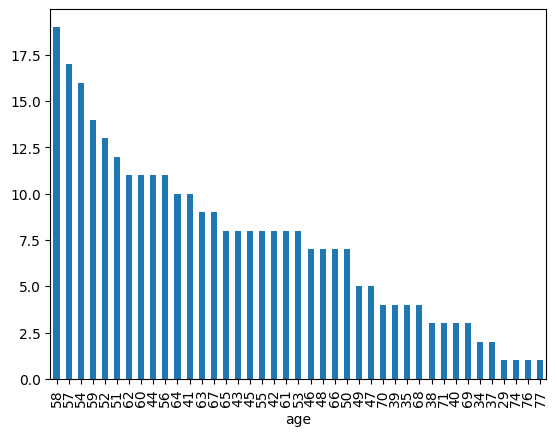

In [49]:
# target columns
data['age'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Disease classes')

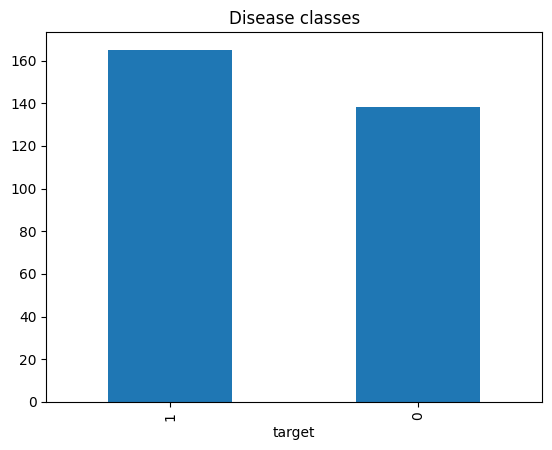

In [17]:
#EDA on Heart Diseases
data['target'].value_counts().plot(kind='bar')
plt.title('Disease classes')

In [18]:
data['age'].value_counts()

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64

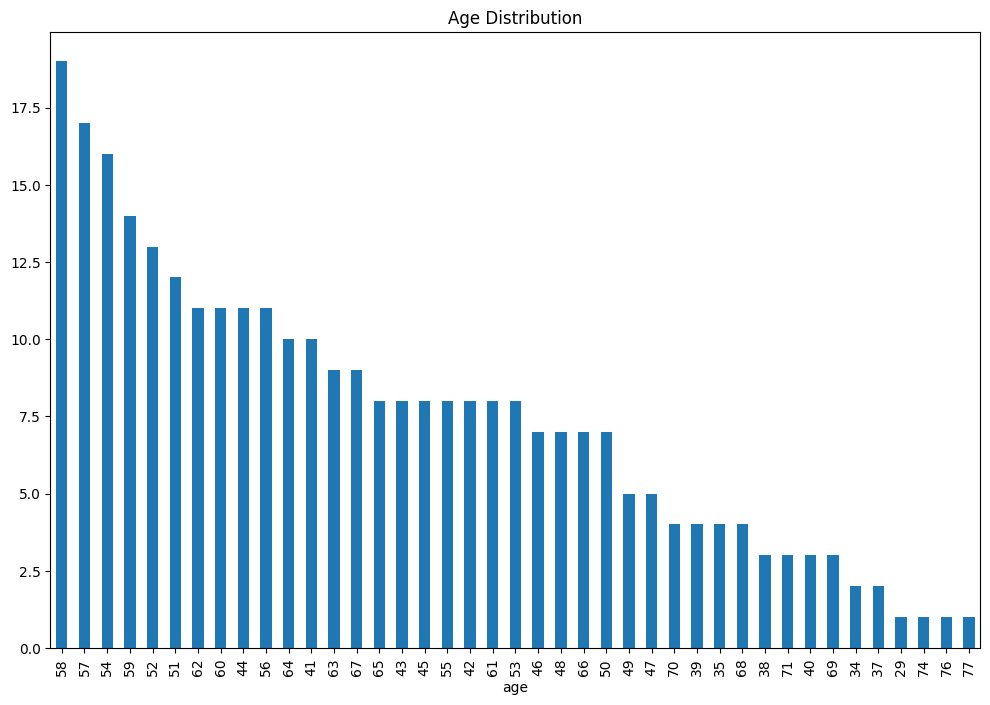

In [52]:
#distribution of age
plt.figure(figsize=(12,8))
data['age'].value_counts().plot(kind='bar')
plt.title('Age Distribution')
plt.show()

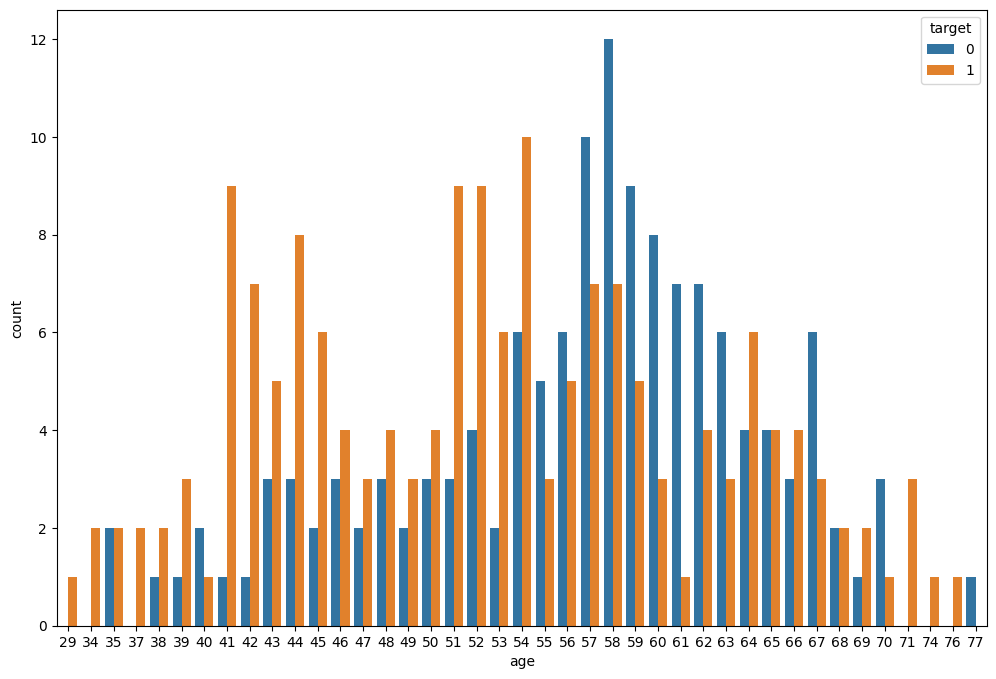

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(x= data['age'],hue='target',data=data)
plt.show()

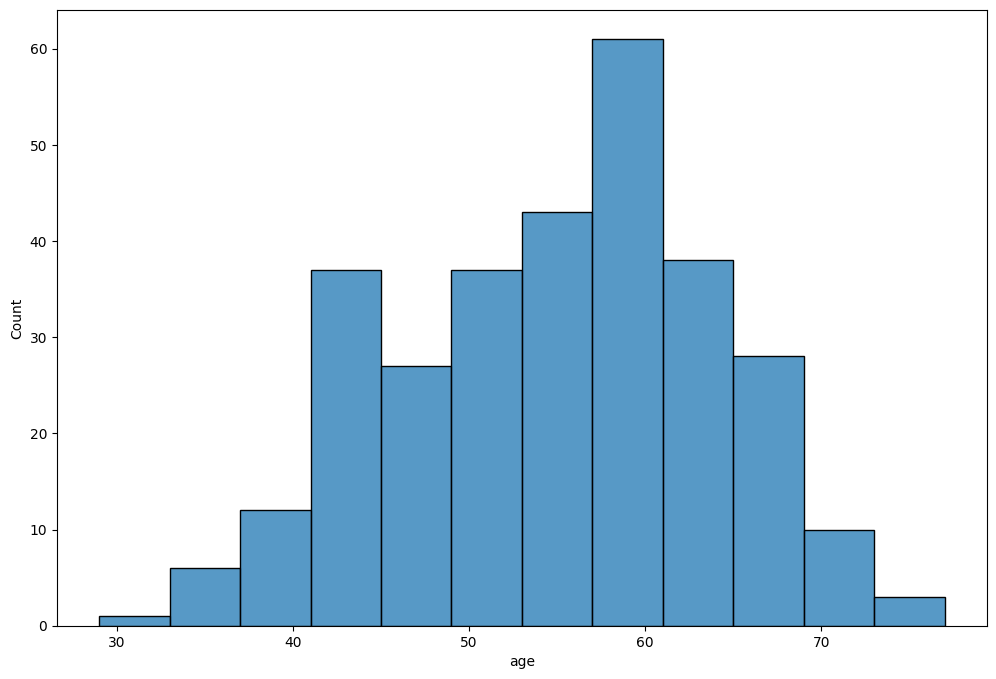

In [21]:
plt.figure(figsize=(12,8))
sns.histplot(x=data['age'],data=data)
plt.show()

In [22]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [23]:
print(data['sex'].value_counts())

sex
1    207
0     96
Name: count, dtype: int64


<Axes: xlabel='sex'>

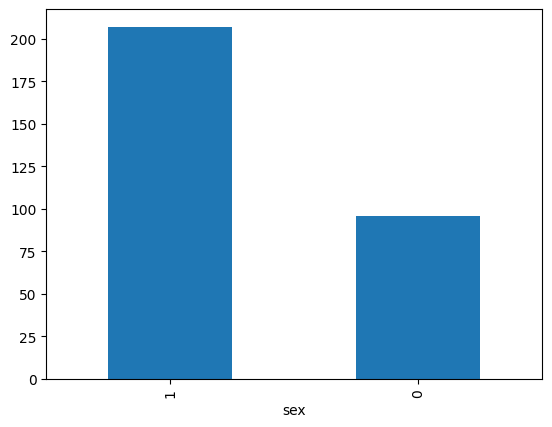

In [24]:
data['sex'].value_counts().plot(kind='bar')

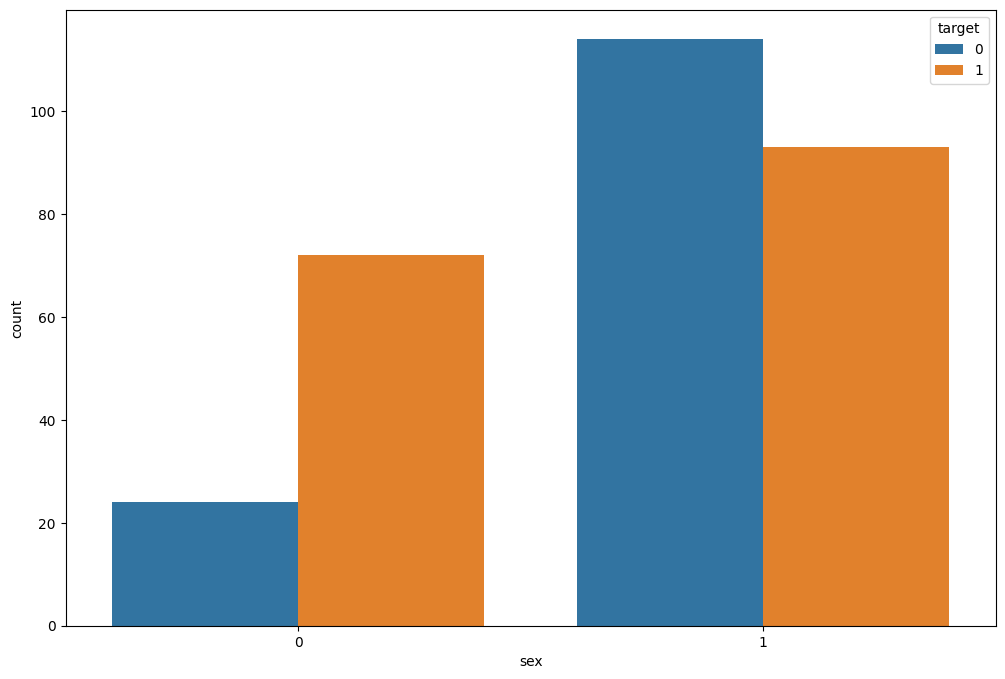

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(x= data['sex'],hue='target',data=data)
plt.show()

In [26]:
help(sns.countplot)

Help on function countplot in module seaborn.categorical:

countplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, stat='count', width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.

    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.

    Note that :func:`histplot` function offers similar functionality with additional
    features (e.g. bar stacking), although its default behavior is somewhat different.

    See the :ref:`tutorial <categorical_tutorial>` for more information.

    .. note::
        By default, this function treats one of the variables as categorical
 

In [27]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [28]:
data['cp'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

<Axes: xlabel='cp'>

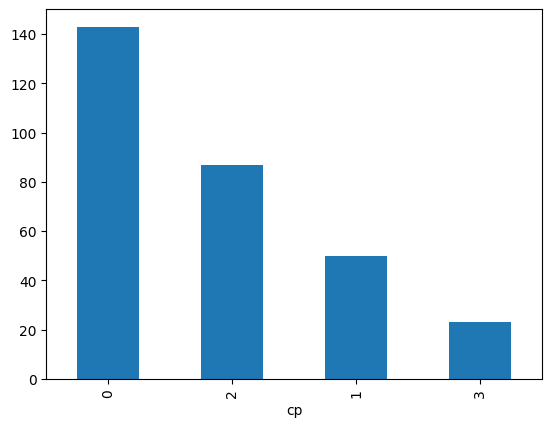

In [29]:
data['cp'].value_counts().plot(kind='bar')

<Axes: xlabel='cp', ylabel='count'>

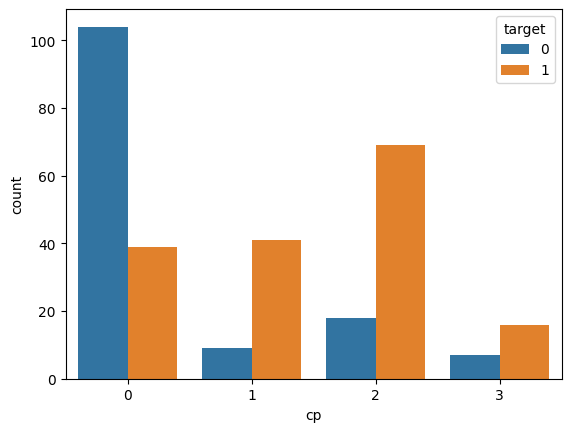

In [30]:
sns.countplot(x=data['cp'],hue='target',data=data)

In [31]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: xlabel='trestbps'>

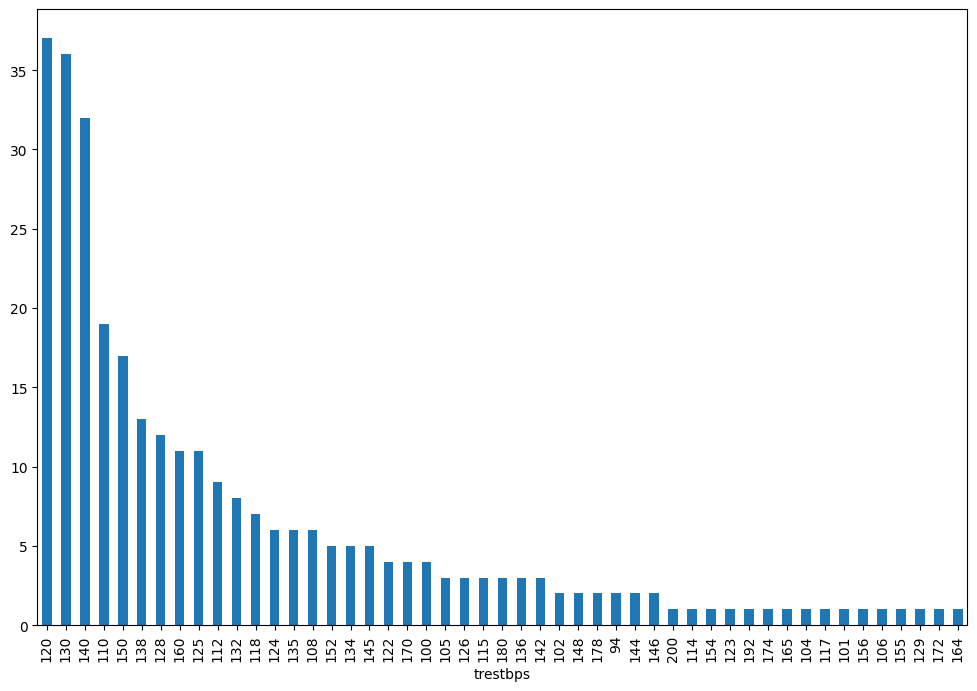

In [32]:
plt.figure(figsize=(12,8))
data['trestbps'].value_counts().plot(kind='bar')

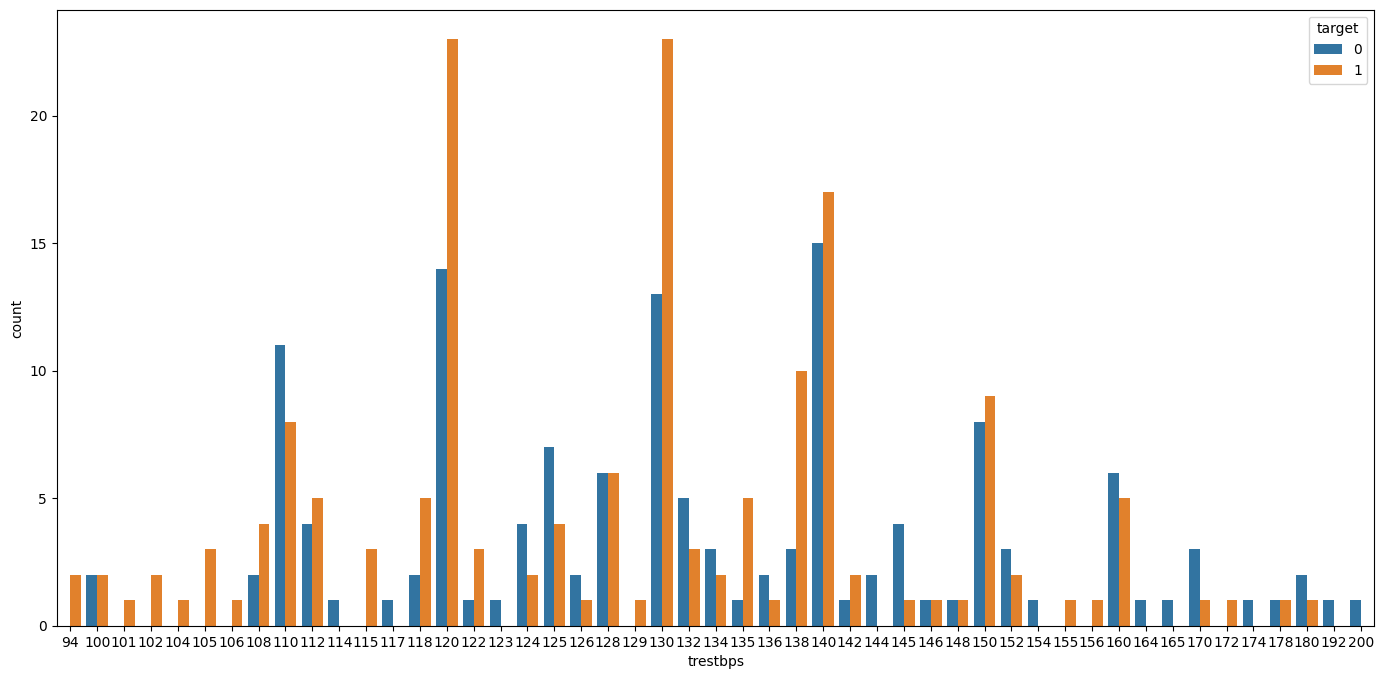

In [33]:
plt.figure(figsize=(17,8))
sns.countplot(x= data['trestbps'],hue='target',data=data)
plt.show()

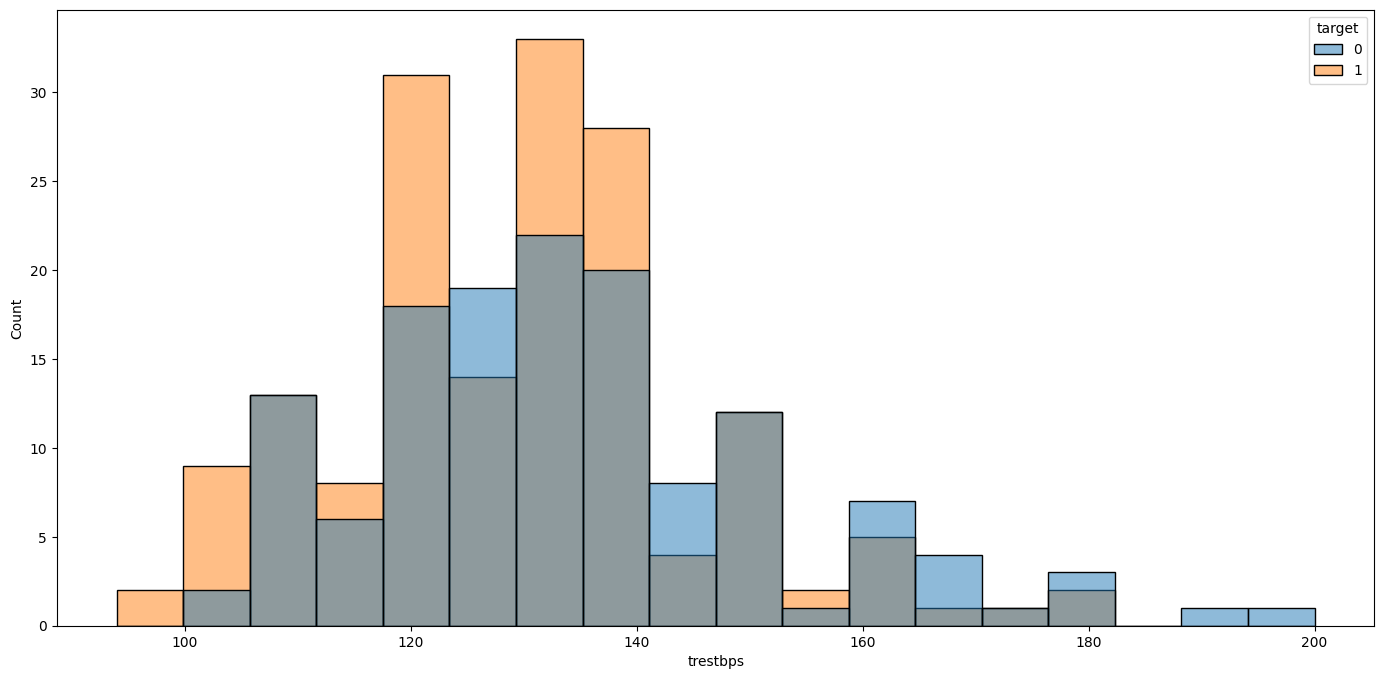

In [34]:
plt.figure(figsize=(17,8))
sns.histplot(x= data['trestbps'],hue='target',data=data)
plt.show()

In [35]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [36]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          3
target        2
dtype: int64

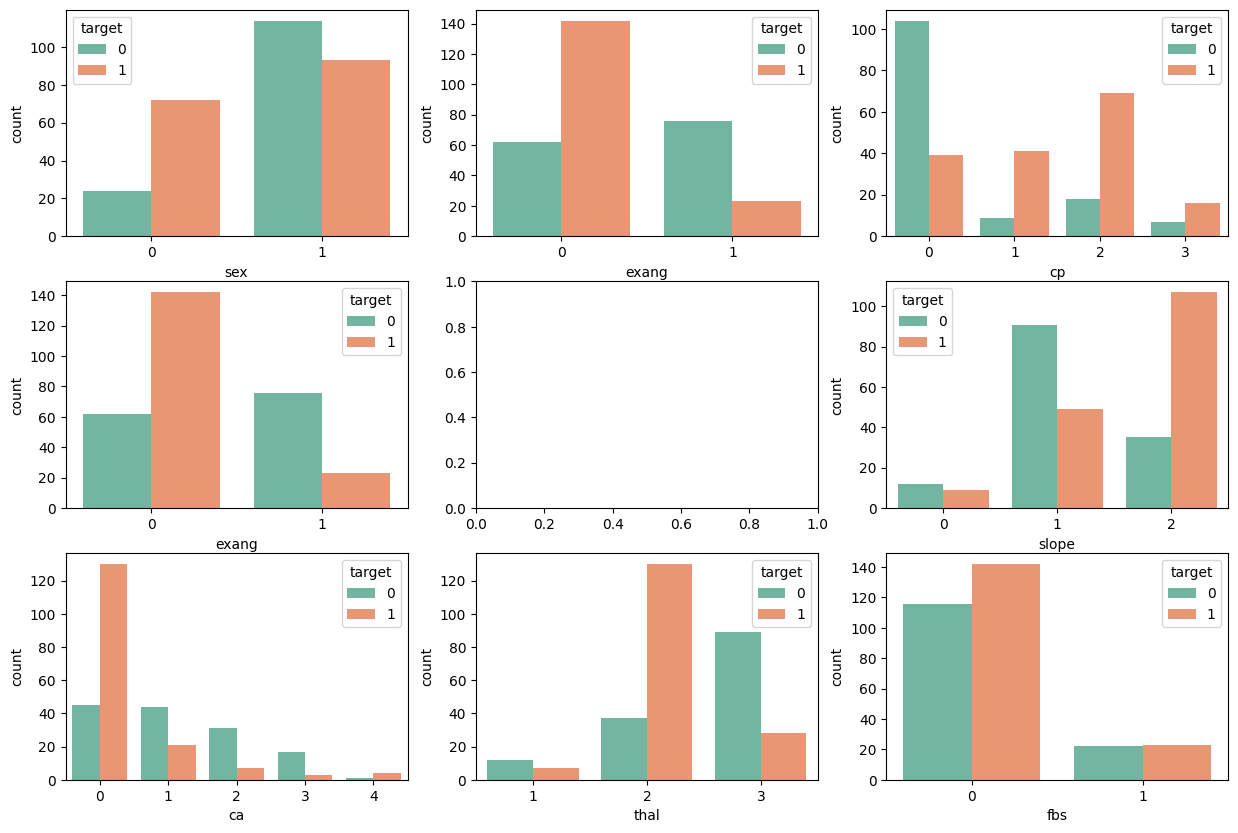

In [37]:
#Create a subplot

fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,10))
cat_features=['sex','exang','cp','exang','target','slope','ca','thal','fbs']
for idx,feature in enumerate(cat_features):
    if feature!='target':
            ax=axes[int(idx/3),idx%3]
            sns.countplot(x=feature,hue='target',ax=ax,data=data,palette='Set2')
plt.show()

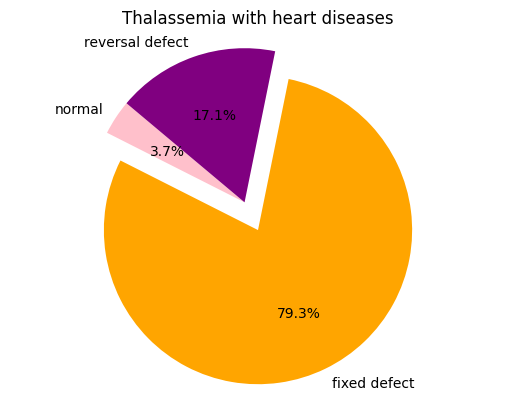

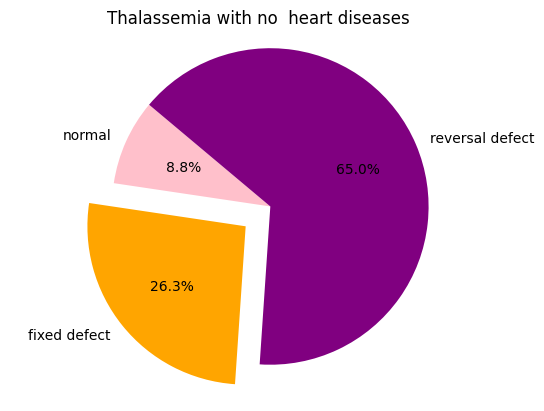

In [38]:

#with heart disease
labels= 'normal','fixed defect','reversal defect'
sizes=[6,130,28]
explode=[0,0.2,0]
colors=['pink','orange','purple']
plt.pie(sizes,labels=labels,autopct='%.1f%%',colors=colors,startangle=140,explode=explode)
plt.axis('equal')
plt.title('Thalassemia with heart diseases')
plt.show()






#with no-heart disease
labels= 'normal','fixed defect','reversal defect'
sizes=[12,36,89]
explode=[0,0.2,0]
colors=['pink','orange','purple']
plt.pie(sizes,labels=labels,autopct='%.1f%%',colors=colors,startangle=140,explode=explode)
plt.axis('equal')
plt.title('Thalassemia with no  heart diseases')
plt.show()

In [39]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

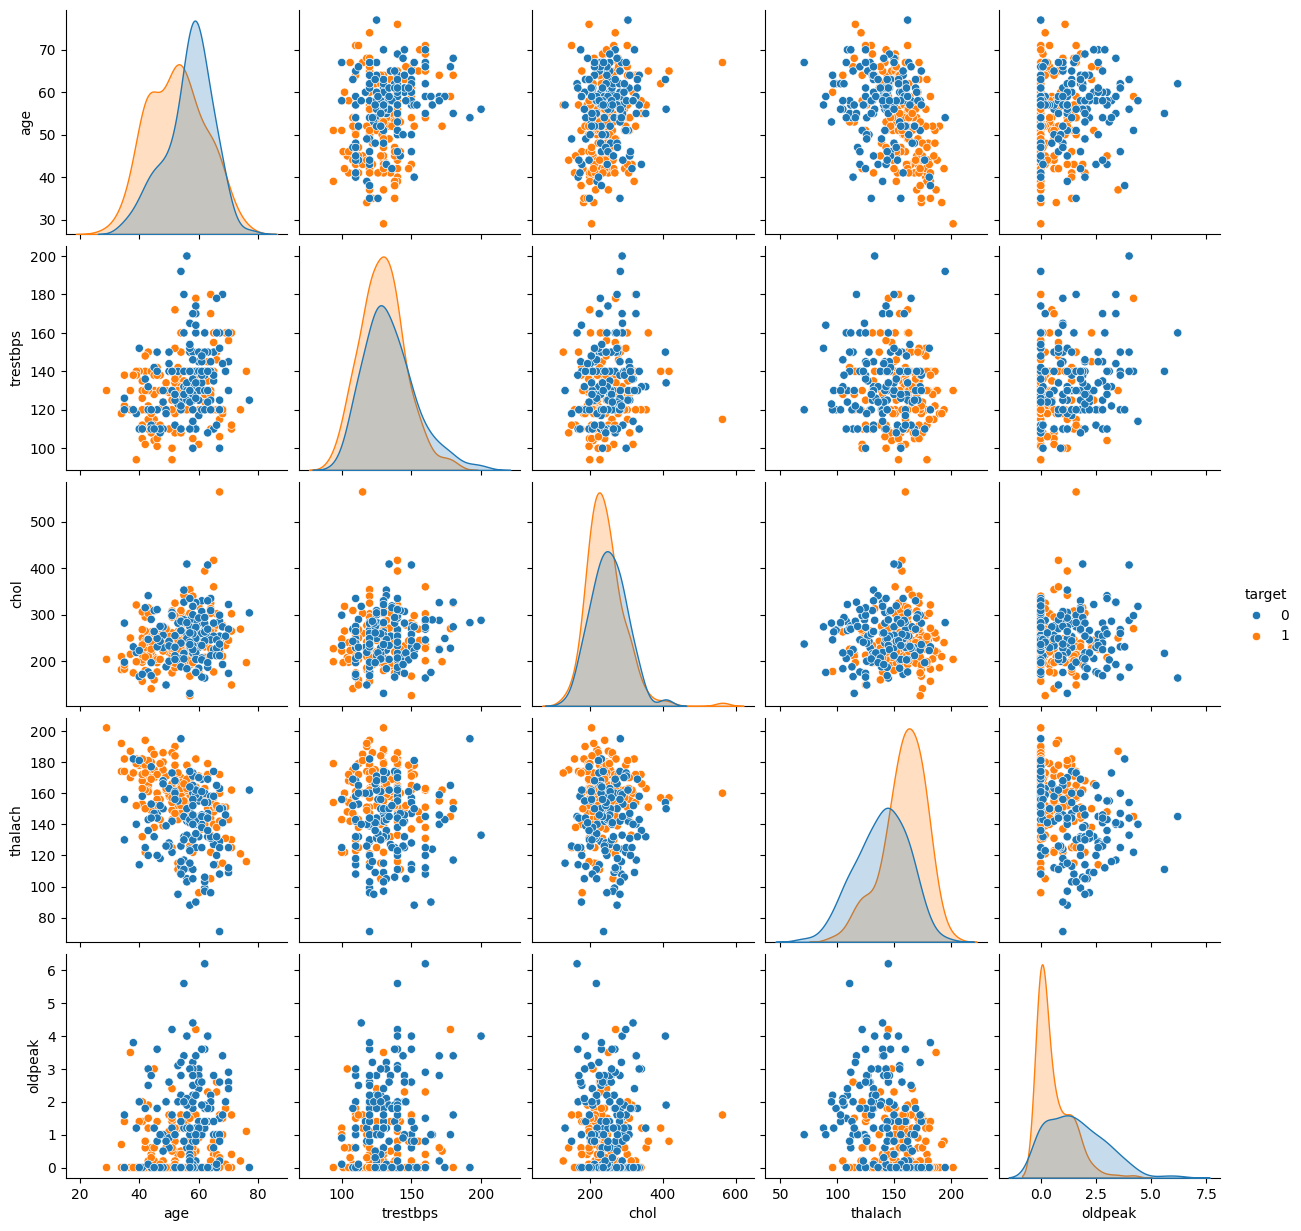

In [40]:
num_var=['age',  'trestbps', 'chol', 'thalach','oldpeak']
sns.pairplot(data[num_var+['target']],hue='target')
plt.show()

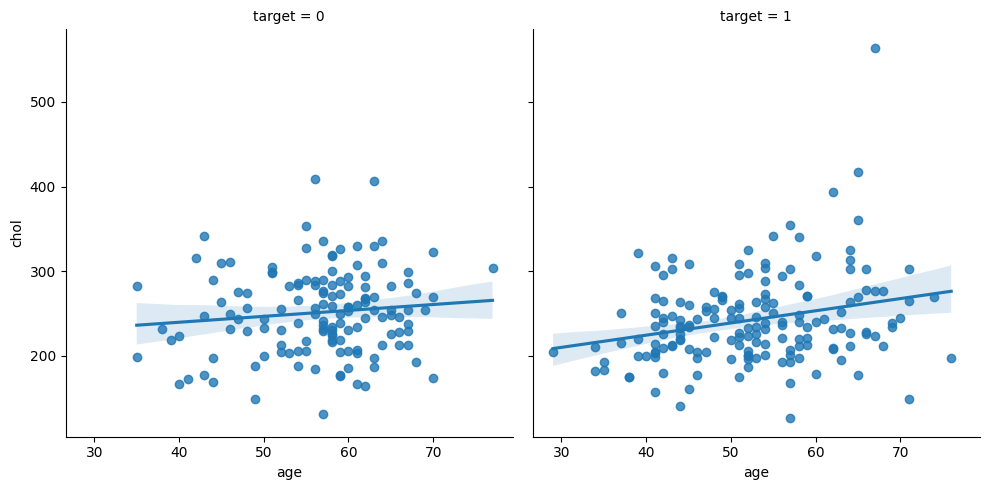

In [41]:
# create a plot to understand relationship between age and chol,according to target

sns.lmplot(x='age',y='chol',col='target',data=data)
plt.show()

In [42]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.067063,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.218231,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.173422,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.061320,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.090458,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.008770,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.008027,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.105871,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.227635,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.213612,-0.430696


<Axes: >

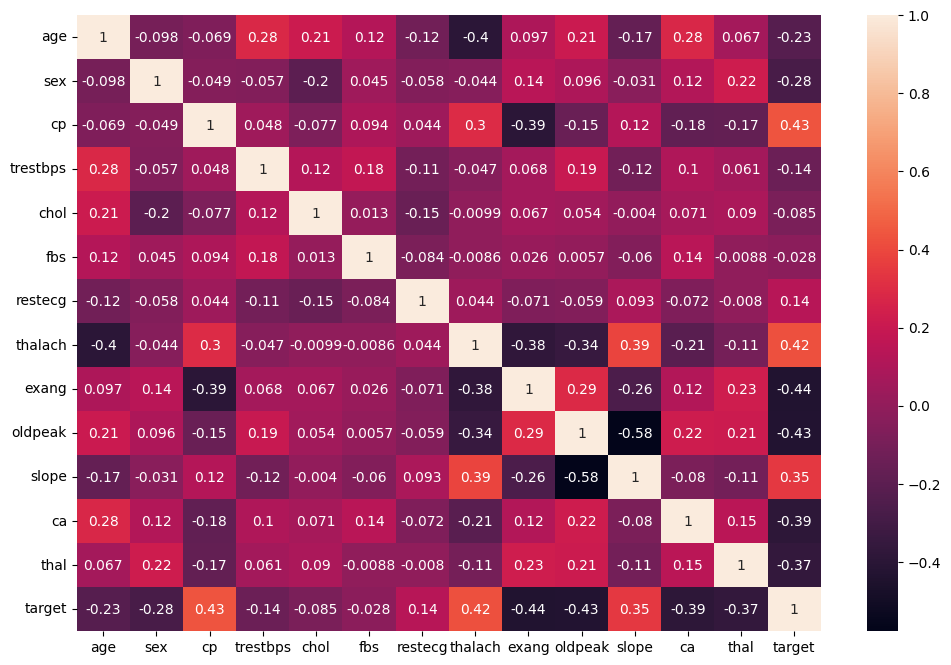

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

1.5 IQR rULE

low= Q1-1.5*IQR
High=Q3+15*IQR

In [43]:
#Seprate Independent & Dep.var
X= data.drop(['target'],axis=1)
Y= data['target']

In [44]:
X

In [45]:
Y

In [ ]:
#create train set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split